Faire une API fonctionnelle

In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)

In [ ]:
layer_norm = keras.layers.Normalization(input_shape=X_train.shape[1:])
layer_hidden1 = keras.layers.Dense(50,activation="relu")
layer_hidden2 = keras.layers.Dense(50,activation="relu")
layer_concat = keras.layers.Concatenate()
layer_output = keras.layers.Dense(1)

In [8]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
norm = layer_norm(input_)
hidden1 = layer_hidden1(norm)
hidden2 = layer_hidden2(hidden1)
concat = layer_concat([norm,hidden2])
output = layer_output(concat)

model = keras.Model(inputs = [input_],outputs=[output])

In [11]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
layer_norm.adapt(X_train)
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 1s 1ms/step - loss: 0.7694 - root_mean_squared_error: 0.8772 - val_loss: 0.4798 - val_root_mean_squared_error: 0.6927
Epoch 2/30
413/413 [==============================] - 0s 1ms/step - loss: 0.4208 - root_mean_squared_error: 0.6487 - val_loss: 0.4080 - val_root_mean_squared_error: 0.6387
Epoch 3/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3707 - root_mean_squared_error: 0.6088 - val_loss: 0.4045 - val_root_mean_squared_error: 0.6360
Epoch 4/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3516 - root_mean_squared_error: 0.5929 - val_loss: 0.3752 - val_root_mean_squared_error: 0.6125
Epoch 5/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3367 - root_mean_squared_error: 0.5803 - val_loss: 0.3594 - val_root_mean_squared_error: 0.5995
Epoch 6/30
413/413 [==============================] - 0s 1ms/step - loss: 0.3254 - root_mean_squared_error: 0.5705 - val_loss: 0.3550 - val_

129/129 [==============================] - 0s 763us/step


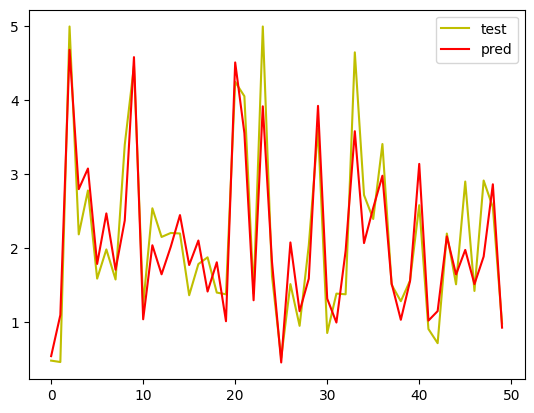

129/129 [==============================] - 0s 857us/step - loss: 0.2845 - root_mean_squared_error: 0.5334
[0.28447917103767395, 0.5333659052848816]


In [13]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model.evaluate(X_test,y_test))